In [39]:
#local packpage
from localpacks.data import get_data

#data set
import pandas as pd
import numpy as np


#Graphics
import matplotlib.pyplot as plt

#model
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = get_data()

In [3]:
df.head(3)

,user_id,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
install_time,,,,,,,,,,,,,
2018-07-04 19:24:24,2ba6f357,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0
2018-07-02 21:08:33,7baa10b6,Android,Buenos Aires,Don Torcuato,female,13,17,5,6,0,2,5,0
2018-07-07 04:18:47,120d379,Android,Santiago del Estero,Santiago del Estero,female,13,17,8,12,0,2,3,0


### Working with a subset

In [4]:
features_sub_set = ['platform','gender','event_1','event_2','event_3','event_4','event_5']

In [5]:
features = df[features_sub_set]

In [6]:
df.head()

,user_id,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
install_time,,,,,,,,,,,,,
2018-07-04 19:24:24,2ba6f357,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0
2018-07-02 21:08:33,7baa10b6,Android,Buenos Aires,Don Torcuato,female,13,17,5,6,0,2,5,0
2018-07-07 04:18:47,120d379,Android,Santiago del Estero,Santiago del Estero,female,13,17,8,12,0,2,3,0
2018-07-03 05:55:47,c35079e1,Android,Buenos Aires,Florencio Varela,male,18,20,35,46,4,10,12,0
2018-07-01 03:22:32,d66b5d4d,Android,Entre Rios,Villa Angelica,male,13,17,38,40,0,6,15,0


### Categorical Variables - Get dummies

In [7]:
features_dummies = pd.get_dummies(features)

In [8]:
features_dummies.head()

,event_1,event_2,event_3,event_4,event_5,platform_Android,platform_iOS,gender_female,gender_male
install_time,,,,,,,,,
2018-07-04 19:24:24,1,2,0,1,1,1,0,0,1
2018-07-02 21:08:33,5,6,0,2,5,1,0,1,0
2018-07-07 04:18:47,8,12,0,2,3,1,0,1,0
2018-07-03 05:55:47,35,46,4,10,12,1,0,0,1
2018-07-01 03:22:32,38,40,0,6,15,1,0,0,1


In [9]:
# Extract NumPy arrays
X = features_dummies.values
y = df['target_churn_indicator'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (15503, 9) y.shape: (15503,)


In [10]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [74]:
#Training our Tree-model
tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.709
Accuracy on test set: 0.703


In [75]:
#visualization
export_graphviz(tree, out_file="tree.dot",
                class_names=["Jack's Surprise!", "Jack's hide"], feature_names=features_dummies.columns,
                impurity=False, filled=True)

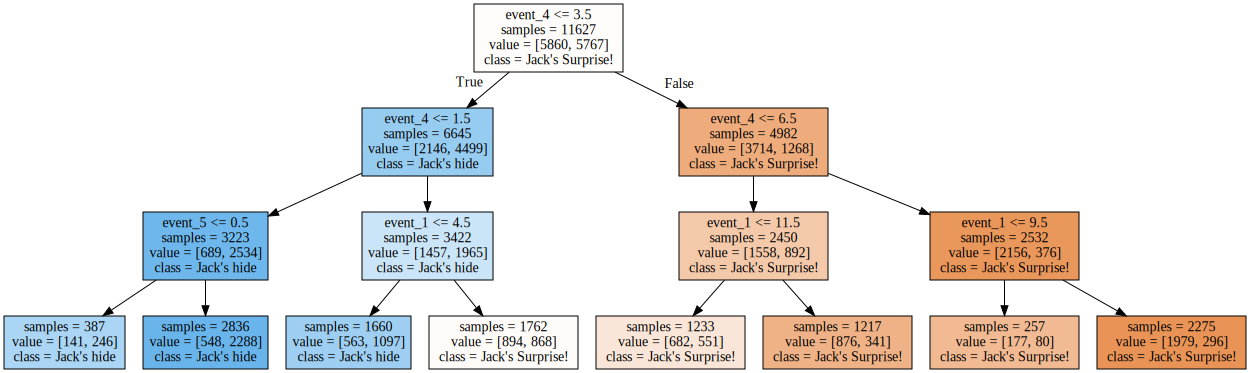

In [76]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

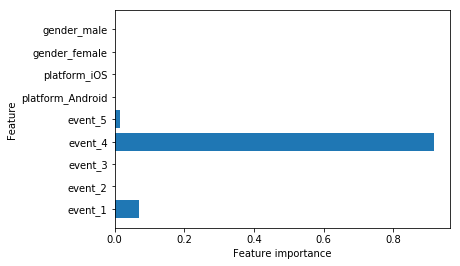

In [80]:
#view the main features
def plot_feature_importances_df(model):
    n_features = np.count_nonzero(features_dummies.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features_dummies.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_df(tree)